<a href="https://colab.research.google.com/github/toliyang/AI_ML/blob/main/Deep%20Learning/S_39_1%20ANN%20(Regression)/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
tf.__version__

'2.19.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
# use url as the file path
fp = 'https://raw.githubusercontent.com/toliyang/AI_ML/refs/heads/main/Deep%20Learning/S_39_1%20ANN%20(Regression)/Folds5x2_pp_adj.csv'

# read as dataframe for applicable data elements
dataset = pd.read_csv(fp)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

In [23]:
# import tf lib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, R2Score

### Initializing the ANN

In [24]:

ann = Sequential()

### Adding the input layer and the first hidden layer

In [26]:
ann.add(Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [27]:
ann.add(Dense(units=6, activation='relu'))

### Adding the output layer

In [28]:
ann.add(Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [30]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=[MeanSquaredError(),
        MeanAbsoluteError(),
        R2Score()])

### Training the ANN model on the Training set

In [32]:

history = ann.fit(X_train, y_train, batch_size = 128, epochs = 100)

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.0139 - mean_absolute_error: 4.3159 - mean_squared_error: 30.0139 - r2_score: 0.8975
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.7447 - mean_absolute_error: 4.2384 - mean_squared_error: 28.7447 - r2_score: 0.9013
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.1026 - mean_absolute_error: 4.2325 - mean_squared_error: 29.1026 - r2_score: 0.9003
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.5264 - mean_absolute_error: 4.2334 - mean_squared_error: 28.5264 - r2_score: 0.9023
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.1338 - mean_absolute_error: 4.1521 - mean_squared_error: 27.1338 - r2_score: 0.9060
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.8521 - mean_absolute_error: 4.2729 - mean_squared_error: 28.8521 - r2_score: 0.9009
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.6240 - mean_absolute_error: 4.1580 - mean_squared_error: 27.62

### Predicting the results of the Test set

In [27]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[430.2  426.18]
 [449.56 451.1 ]
 [445.08 442.87]
 ...
 [456.08 454.2 ]
 [449.11 444.13]
 [431.42 436.58]]


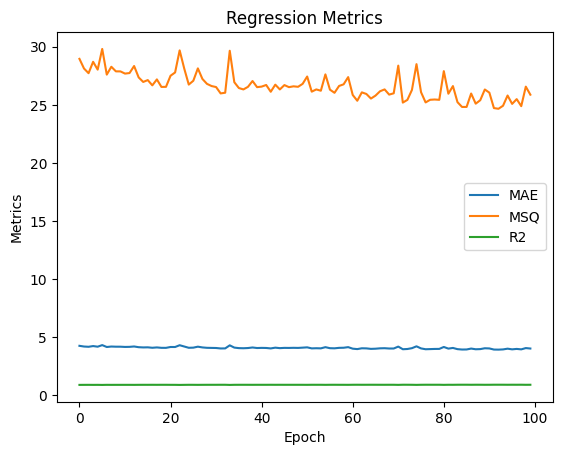

In [36]:
# Plot training & validation Mean Absolute Error values
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['r2_score'])
plt.title('Regression Metrics')
plt.ylabel('Metrics')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSQ','R2'], loc='right')
plt.show()